In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


## x_train, y_train, x_test, y_test shape을 뽑아주세요

In [6]:
print(len(x_train))
print(x_train.shape)
print(y_train.shape)

50000
(50000, 32, 32, 3)
(50000, 1)


## plt.imshow를 이용해 train데이터를 plot해보세요

## 위에서 뽑은 y_train데이터의 one-hot으로 변환해주세요

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

## 최대/최소 정규화를 해주세요

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train.max()

1.0

## CNN모델을 설계해주세요

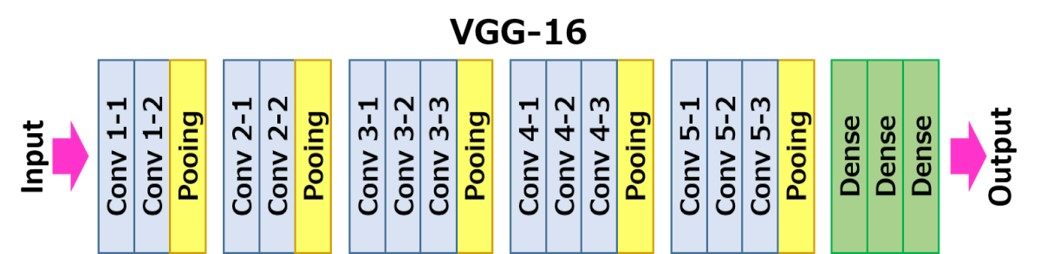

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(1,1))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))

##  다른 방법

In [11]:
def build_vgg_block(input_layer,
                    num_cnn=3,
                    channel=64,
                    block_num=1,
                    ):
    # 입력레이어
    x = input_layer

    # CNN 레이어
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters = channel,
            kernel_size = (3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)

    # Max Pooling 레이어
    x = keras.layers.MaxPooling2D(
        pool_size = (2,2),
        strides = 2,
        name=f'block{block_num}_pooling'
    )(x)

    return x

In [12]:
vgg_input_layer = keras.layers.Input(shape=(32, 32, 3)) #입력레이어 생성
vgg_block_output = build_vgg_block(vgg_input_layer) # VGG 블록 생성

In [13]:
model = keras.Model(inputs=vgg_input_layer, outputs=vgg_block_output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv0 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pooling (MaxPooling  (None, 16, 16, 64)        0         
 2D)                                                             
                                                                 
Total params: 75648 (295.50 KB)
Trainable params: 75648 (295.50 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [15]:
def build_vgg(input_shape=(32, 32, 3),
              num_cnn_list=[2, 2, 3, 3, 3],
              channel_list = [64, 128, 256, 512, 512],
              num_classes=10):
    assert len(num_cnn_list) == len(channel_list) # 모델을 만들기 전에 config list들이 같은 길이인지 확인

    input_layer = keras.layers.Input(shape=input_shape)
    output = input_layer

    # config list들이 길이 만큼 ㅁ반복해서 블록을 생성
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_vgg_block(
            output,
            num_cnn = num_cnn,
            channel = channel,
            block_num= i
        )

    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name= 'predictions')(output)

    model = keras.Model(
        inputs=input_layer,
        outputs= output
    )
    return model


In [16]:
vgg_16 = build_vgg()
vgg_16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block0_conv0 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block0_conv1 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block0_pooling (MaxPooling  (None, 16, 16, 64)        0         
 2D)                                                             
                                                                 
 block1_conv0 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block1_conv1 (Conv2D)       (None, 16, 16, 128)       147584    
                                                           